# Plots for paper 1 #

Looking at the decadal predictability of surface variables over Europe

First set of plots will be a 2 x 2 matrix of skill plots (raw or lagged) for the different variables.

Then we will combine this with the long period lagged and var adjusted NAO plots.

In [1]:
# Notebook magic
%matplotlib inline
# Autoreload
%load_ext autoreload
%autoreload 2

# Local Imports
import os
import sys
import glob

# Third-Party Imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Local imports
sys.path.append("/home/users/benhutch/skill-maps")
import dictionaries as dicts

# Import dicts from further afield
sys.path.append("/home/users/benhutch/energy-met-corr")
import dictionaries_em as dicts_em

# # Import functions from skill-maps
sys.path.append("/home/users/benhutch/skill-maps/python")
# import functions as fnc
import plotting_functions as plt_fnc

# Import functions
import functions as fnc

# Import functions from plot_init_benefit
sys.path.append("/home/users/benhutch/skill-maps/rose-suite-matching")
import plot_init_benefit as pib_fnc

# Import the nao_matching_seasons functions
import nao_matching_seasons as nao_match_fnc

# Import the functions from process_bs_values
import process_bs_values as pbs_func

# Import the functions from nao_alt_lag_functions
import nao_alt_lag_functions as nal_fnc

/home/users/benhutch/.conda/envs/bens-conda-env2/lib/python3.11/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [3]:
# Import the functions from paper1_plots_functions
import paper1_plots_functions as p1_fnc

## Exploring time series ###

E.g. looking at what happens with MSLP over the Rocky Mountains during winter, or over Greenland for MSLP during the summer compared to over the UK.

In [4]:
nino34 = {
    "lon1": -170,  # degrees east
    "lon2": -120,
    "lat1": -5,  # degrees north
    "lat2": 5,
}

In [5]:
# Set up the variables
season = "ONDJFM"
forecast_range = "2-9"
start_year = 1961
end_year = 2014
lag = 4
alt_lag = "alt_lag"
region = "global"
variable = "ua"
grid = dicts.n_eur_wind_box
gridbox_name = "N Europe wind box"
data_dir = "/gws/nopw/j04/canari/users/benhutch/alternate-lag-processed-data/test-sfcWind"

In [6]:
data = nal_fnc.load_data(
    season=season,
    forecast_range=forecast_range,
    start_year=start_year,
    end_year=end_year,
    lag=lag,
    method=alt_lag,
    region=region,
    variable=variable,
    data_dir=data_dir,
)

Shape of the data: (51, 428, 72, 144)


In [7]:
# importlib
import importlib

# Reload the dictionaries
importlib.reload(sys.modules["dictionaries"])

# Import the dictionaries
import dictionaries as dicts

# reload the p1 functions
importlib.reload(sys.modules["paper1_plots_functions"])

<module 'paper1_plots_functions' from '/home/users/benhutch/skill-maps/python/paper1_plots_functions.py'>

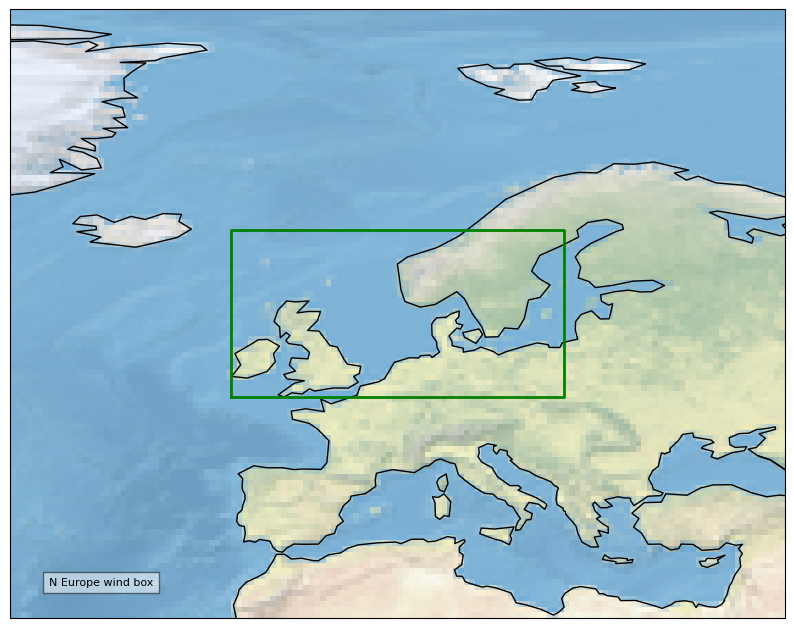

In [8]:
# Take a look at the rocky mountains grid box
p1_fnc.show_gridbox(
    grid=grid,
    grid_name=gridbox_name,
    figsize_x=10,
    figsize_y=12,
)

In [9]:
%tb

# Load the time series for the rocky mountains
rm_dict = p1_fnc.load_ts_data(
    data=data,
    season=season,
    forecast_range=forecast_range,
    start_year=start_year,
    end_year=end_year,
    lag=lag,
    gridbox=grid,
    gridbox_name=gridbox_name,
    variable=variable,
    alt_lag="alt_lag",  # Set to True to use the alternative lag, false raw
    region=region,
    level="85000",
)

No traceback available to show.
/home/users/benhutch/.conda/envs/bens-conda-env2/lib/python3.11/site-packages/iris/coords.py:2171: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 'time', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'time'. Ignoring bounds.
  warnings.warn(
/home/users/benhutch/.conda/envs/bens-conda-env2/lib/python3.11/site-packages/xarray/groupers.py:392: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


The obs variable is a wind speed variable
Loading regrid obs file using xarray:  /gws/nopw/j04/canari/users/benhutch/ERA5/global_regrid_sel_region_var131_85000.nc
Obs pre level extract: var131 / (unknown)                  (time: 764; air_pressure: 5; latitude: 72; longitude: 144)
    Dimension coordinates:
        time                             x                  -            -              -
        air_pressure                     -                  x            -              -
        latitude                         -                  -            x              -
        longitude                        -                  -            -              x
    Attributes:
        CDI                         'Climate Data Interface version 2.0.4 (https://mpimet.mpg.de/cdi)'
        CDO                         'Climate Data Operators version 2.0.4 (https://mpimet.mpg.de/cdo)'
        Conventions                 'CF-1.6'
        code                        np.int32(131)
        history

/home/users/benhutch/.conda/envs/bens-conda-env2/lib/python3.11/site-packages/iris/coords.py:2171: IrisVagueMetadataWarning: Cannot check if coordinate is contiguous: Invalid operation for 'time', with 0 bound(s). Contiguous bounds are only defined for 1D coordinates with 2 bounds. Metadata may not be fully descriptive for 'time'. Ignoring bounds.
  warnings.warn(
/home/users/benhutch/.conda/envs/bens-conda-env2/lib/python3.11/site-packages/xarray/groupers.py:392: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


Processing the alt_lag data
alt_lag_first_year = 1969
alt_lag_last_year = 2019
obs_anoms.shape = (51,)
data.shape = (428, 51, 72, 144)
obs_anoms.shape = (51,)
len valid_years = 51
modified model data.shape = (428, 51, 72, 144)
model data members.shape = (428, 51)


In [10]:
rm_dict["fcst_ts_members"].shape

(428, 51)

In [23]:
rm_dict["obs_ts"].shape

(51,)

In [15]:
rm_dict.keys()

dict_keys(['obs_ts', 'obs_ts_short', 'fcst_ts_members', 'fcst_ts_members_short', 'fcst_ts_min', 'fcst_ts_min_short', 'fcst_ts_max', 'fcst_ts_max_short', 'fcst_ts_mean', 'fcst_ts_mean_short', 'init_years', 'init_years_short', 'valid_years', 'valid_years_short', 'nens', 'corr', 'corr_short', 'p', 'p_short', 'rpc', 'rpc_short', 'rps', 'rps_short', 'season', 'forecast_range', 'start_year', 'end_year', 'lag', 'variable', 'gridbox', 'gridbox_name', 'alt_lag'])

In [21]:
# Set up a name for this array
fname = f"{gridbox_name}_{season}_{forecast_range}_{start_year}_{end_year}_{lag}_{variable}_{alt_lag}_{region}"
fname_obs = f"obs_{gridbox_name}_{season}_{start_year}_{end_year}_{variable}_{region}"

In [12]:
save_df = "/home/users/benhutch/energy-met-corr-functions/saved_arrs/"

In [22]:
# Set up the full path
full_path = os.path.join(save_df, fname)

# if the file does not exist, save it
if not os.path.exists(full_path):
    np.save(full_path, rm_dict["fcst_ts_members"])

full_path_obs = os.path.join(save_df, fname_obs)

# if the file does not exist, save it
if not os.path.exists(full_path_obs):
    np.save(full_path_obs, rm_dict["obs_ts"])

In [14]:
# Load this into a pandas dataframe
rm_df = p1_fnc.df_from_ts_dict(
    ts_dict=rm_dict,
    season=season,
    forecast_range=forecast_range,
    start_year=start_year,
    end_year=end_year,
    lag=lag,
    gridbox_name="N_Europe_wind_box",
    variable=variable,
    alt_lag=alt_lag,  # Set to True to use the alternative lag, false raw
    region=region,
)

df saved to /gws/nopw/j04/canari/users/benhutch/nao_stats_df/ua_global_ONDJFM_2-9_1961_2014_4_N_Europe_wind_box_alt_lag.csv


In [16]:
# rm_df.head()

In [17]:
import importlib

importlib.reload(sys.modules["paper1_plots_functions"])

<module 'paper1_plots_functions' from '/home/users/benhutch/skill-maps/python/paper1_plots_functions.py'>

In [18]:
# rm_dict["fcst_ts_members"].shape

fcst_members.shape = (428, 51)
Bootstrapping for significance


  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:01<00:00, 873.31it/s]


Bootstrapping complete
Setting ts_dict['corr'] to the first value of corr_arr
Setting ts_dict['p'] to the count_values / nboot


ValueError: Variable not recognised!

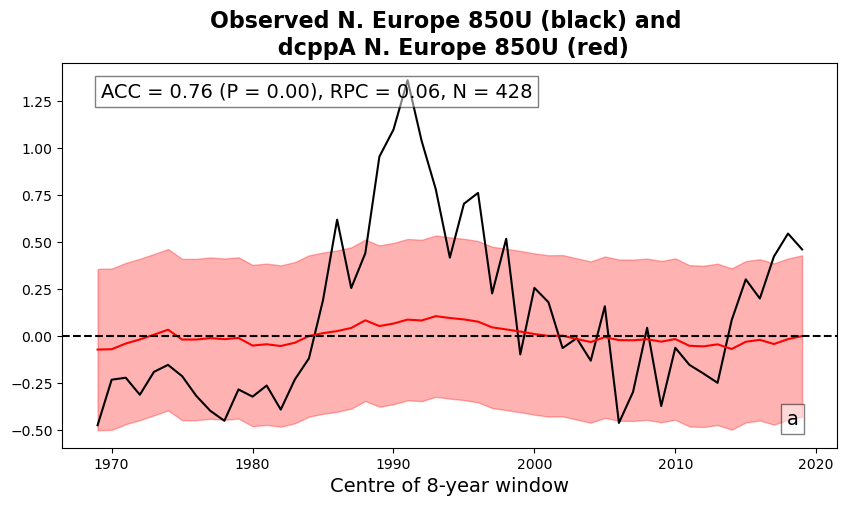

In [19]:
# # Plot the time series
p1_fnc.plot_ts(
    ts_dict=rm_dict,
    figsize_x=10,
    figsize_y=5,
    short_period=False,
    standardise=False,
    do_detrend=False,
    title="Observed N. Europe 850U (black) and \n dcppA N. Europe 850U (red)",
    label="a",
    fontsize=14,
    calc_rmse=True,
)

In [19]:
# # Plot the time series
# p1_fnc.plot_ts(
#     ts_dict=rm_dict,
#     figsize_x=10,
#     figsize_y=4,
#     short_period=False,
#     standardise=False,
#     do_detrend=True,
# )

In [20]:
# # Create two copies of the data
# rm_dict_copy = rm_dict.copy()
# rm_dict_copy2 = rm_dict.copy()

In [21]:
# # Set the constrain years
# constrain_years = np.arange(1961, 2005 + 1)

# # Test the plotting function
# p1_fnc.plot_ts(
#     ts_dict=rm_dict_copy,
#     figsize_x=10,
#     figsize_y=6,
#     trendline=True,
#     constrain_years=constrain_years,
# )

In [22]:
# # Set the constrain years
# constrain_years = np.arange(2005, 2014 + 1)

# # Test the plotting function
# p1_fnc.plot_ts(
#     ts_dict=rm_dict_copy2,
#     figsize_x=10,
#     figsize_y=6,
#     trendline=True,
#     constrain_years=constrain_years,
# )

In [23]:
# Set up the variables
variables = ["tas", "sfcWind", "rsds", "pr"]
no_bootstraps_list = [1000, 1000, 1000, 1000]
no_bootstraps_list2 = [1]
season = "AMJJAS"
model_season = "AYULGS"
forecast_range = "2-9"
methods1 = ["alt_lag", "alt_lag", "alt_lag", "alt_lag"]
gridbox_corr_list = [
    dicts.n_eur_wind_box,
    dicts.n_eur_wind_box,
    dicts.med_box_focus,
    dicts.scandi_box,
]
# methods2 = ["new_raw", "new_raw"]
# methods_diff = "NAO-matched - lag"
# # method = "new_raw"

In [24]:
# Check whether the files exist
existing_files = p1_fnc.check_bootstraps_exist(
    variables=variables,
    no_bootstraps=no_bootstraps_list,
    season=season,
    forecast_range=forecast_range,
    method=methods1,
)

Checking whether bootstraps exist for method alt_lag...
Checking whether bootstraps exist for variable tas...
Checking whether bootstraps exist for 1000 bootstraps...
Checking whether bootstraps exist for variable sfcWind...
Checking whether bootstraps exist for 1000 bootstraps...
Checking whether bootstraps exist for variable rsds...
Checking whether bootstraps exist for 1000 bootstraps...
Checking whether bootstraps exist for variable pr...
Checking whether bootstraps exist for 1000 bootstraps...
Checking whether bootstraps exist for method alt_lag...
Checking whether bootstraps exist for variable tas...
Checking whether bootstraps exist for 1000 bootstraps...
Checking whether bootstraps exist for variable sfcWind...
Checking whether bootstraps exist for 1000 bootstraps...
Checking whether bootstraps exist for variable rsds...
Checking whether bootstraps exist for 1000 bootstraps...
Checking whether bootstraps exist for variable pr...
Checking whether bootstraps exist for 1000 bootst

In [25]:
# # Check whether the files exist for the otehr method
# existing_files2 = p1_fnc.check_bootstraps_exist(
#     variables=variables,
#     no_bootstraps=no_bootstraps_list,
#     season=season,
#     forecast_range=forecast_range,
#     method=methods2,
# )

In [26]:
# print(existing_files)

In [27]:
# Import importlib
import importlib

# Reload the module
importlib.reload(sys.modules["paper1_plots_functions"])

# Import the function again
import paper1_plots_functions as p1_fnc

In [28]:
# Form the stats dictionaries for these
stats_dicts1 = p1_fnc.create_bs_dict(
    variables=variables,
    no_bootstraps=no_bootstraps_list,
    season=season,
    forecast_range=forecast_range,
    methods=methods1,
    model_season=model_season,
    load_hist=False,
)

# /gws/nopw/j04/canari/users/benhutch/bootstrapping/sfcWind/global/ONDJFM/2-9/new_raw/no_bootstraps_100/

Processing variable tas...
Processing 1000 bootstraps...
base_path = /gws/nopw/j04/canari/users/benhutch/bootstrapping/tas/global/AMJJAS/2-9/alt_lag/no_bootstraps_1000


Processing variable sfcWind...
Processing 1000 bootstraps...
base_path = /gws/nopw/j04/canari/users/benhutch/bootstrapping/sfcWind/global/AMJJAS/2-9/alt_lag/no_bootstraps_1000
Processing variable rsds...
Processing 1000 bootstraps...
base_path = /gws/nopw/j04/canari/users/benhutch/bootstrapping/rsds/global/AMJJAS/2-9/alt_lag/no_bootstraps_1000
Processing variable pr...
Processing 1000 bootstraps...
base_path = /gws/nopw/j04/canari/users/benhutch/bootstrapping/pr/global/AMJJAS/2-9/alt_lag/no_bootstraps_1000


In [29]:
# # # keys in the dictionary
# stats_dicts1[('tas', 'nboot_1000', 'nao_matched')].keys()

In [30]:
# stats_dicts2 = p1_fnc.create_bs_dict(
#     variables=variables,
#     no_bootstraps=no_bootstraps_list2,
#     season=season,
#     forecast_range=forecast_range,
#     methods=methods2,
#     model_season=model_season,
# )

In [31]:
# # Print the keys for stats_dicts2
# stats_dicts2.keys()

In [32]:
# Import importlib
import importlib

# Reload the module
importlib.reload(sys.modules["paper1_plots_functions"])
importlib.reload(sys.modules["dictionaries"])

# Import the function again
import paper1_plots_functions as p1_fnc
import dictionaries as dicts

In [33]:
gridbox_corr_list = [
    dicts.uk_grid,
    dicts.n_eur_wind_box,
    dicts.med_box_focus,
    dicts.scandi_box,
]

In [34]:
print(stats_dicts1.keys())

dict_keys([('tas', 'nboot_1000', 'alt_lag'), ('sfcWind', 'nboot_1000', 'alt_lag'), ('rsds', 'nboot_1000', 'alt_lag'), ('pr', 'nboot_1000', 'alt_lag')])


In [38]:
import importlib

importlib.reload(sys.modules["paper1_plots_functions"])

<module 'paper1_plots_functions' from '/home/users/benhutch/skill-maps/python/paper1_plots_functions.py'>

In [39]:
season

'AMJJAS'

Setting up the axis...
variables = ['tas', 'sfcWind', 'rsds', 'pr']
Plotting the correlations for a single method...
Plotting variable ('tas', 'nboot_1000', 'alt_lag')...
Plotting index 0...
start_year = [1969 2010]
end_year = [1969 2010]
nens1 = 712
for variable ('tas', 'nboot_1000', 'alt_lag')
fcst1_ts.shape = (51, 72, 144)
obs_ts.shape = (51, 72, 144)
Constraining data to gridbox_plot...
As defined by gridbox_plot =  {'lon1': -70, 'lon2': 40, 'lat1': 20, 'lat2': 90}
Setting up axis 3rd/4th time this?
Calculating the correlations with a specific gridbox...
As defined by gridbox_corr =  {'lon1': -10, 'lon2': 3, 'lat1': 50, 'lat2': 60}
Variable is not psl
More than one file found
Using the latest datetime file: /gws/nopw/j04/canari/users/benhutch/alternate-lag-processed-data/tas_AYULGS_global_1964_2014_2-9_4_1708534011.994149_alternate_lag.npy


/home/users/benhutch/skill-maps/python/nao_alt_lag_functions.py:124: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  datetimes = [pd.to_datetime(datetime, unit="s") for datetime in datetimes]


Shape of the data: (51, 712, 72, 144)
fcst1_ts_members_mean.shape = (51, 712)
n_times = 51
fcst1_ts_members_mean.shape = (51, 712)
nens = 712


100%|██████████| 1000/1000 [00:01<00:00, 566.20it/s]


computed resampled (time only) r = 0.9284688222129207, p = 0.0
computed resampled (time + members) r = 0.9284688222129207, p = 0.0
gridbox avg r = 0.9067833381922945, p = 0.0
Plotting variable ('sfcWind', 'nboot_1000', 'alt_lag')...
Plotting index 1...
start_year = [1969 2010]
end_year = [1969 2010]
nens1 = 524
for variable ('sfcWind', 'nboot_1000', 'alt_lag')
fcst1_ts.shape = (51, 72, 144)
obs_ts.shape = (51, 72, 144)
Constraining data to gridbox_plot...
As defined by gridbox_plot =  {'lon1': -70, 'lon2': 40, 'lat1': 20, 'lat2': 90}
Setting up axis 3rd/4th time this?
Calculating the correlations with a specific gridbox...
As defined by gridbox_corr =  {'lon1': -10, 'lon2': 20, 'lat1': 50, 'lat2': 65}
Variable is not psl
Shape of the data: (51, 524, 72, 144)
fcst1_ts_members_mean.shape = (51, 524)
n_times = 51
fcst1_ts_members_mean.shape = (51, 524)
nens = 524


100%|██████████| 1000/1000 [00:01<00:00, 649.42it/s]


computed resampled (time only) r = -0.043851206768783915, p = 0.531
computed resampled (time + members) r = -0.043851206768784005, p = 0.531
gridbox avg r = 0.06753888006622816, p = 0.46447222222222223
Plotting variable ('rsds', 'nboot_1000', 'alt_lag')...
Plotting index 2...
start_year = [1969 2010]
end_year = [1969 2010]
nens1 = 664
for variable ('rsds', 'nboot_1000', 'alt_lag')
fcst1_ts.shape = (51, 72, 144)
obs_ts.shape = (51, 72, 144)
Constraining data to gridbox_plot...
As defined by gridbox_plot =  {'lon1': -70, 'lon2': 40, 'lat1': 20, 'lat2': 90}
Setting up axis 3rd/4th time this?
Calculating the correlations with a specific gridbox...
As defined by gridbox_corr =  {'lon1': -11, 'lon2': 2, 'lat1': 35, 'lat2': 45}
Variable is not psl
Shape of the data: (51, 664, 72, 144)
fcst1_ts_members_mean.shape = (51, 664)
n_times = 51
fcst1_ts_members_mean.shape = (51, 664)
nens = 664


100%|██████████| 1000/1000 [00:01<00:00, 636.59it/s]


computed resampled (time only) r = 0.8407954725990331, p = 0.0
computed resampled (time + members) r = 0.8407954725990331, p = 0.0
gridbox avg r = 0.6667357762368846, p = 0.04725
Plotting variable ('pr', 'nboot_1000', 'alt_lag')...
Plotting index 3...
start_year = [1969 2010]
end_year = [1969 2010]
nens1 = 492
for variable ('pr', 'nboot_1000', 'alt_lag')
fcst1_ts.shape = (51, 72, 144)
obs_ts.shape = (51, 72, 144)
Constraining data to gridbox_plot...
As defined by gridbox_plot =  {'lon1': -70, 'lon2': 40, 'lat1': 20, 'lat2': 90}
Setting up axis 3rd/4th time this?
Calculating the correlations with a specific gridbox...
As defined by gridbox_corr =  {'lon1': 2, 'lon2': 23, 'lat1': 56, 'lat2': 71}
Variable is not psl
Shape of the data: (51, 492, 72, 144)
fcst1_ts_members_mean.shape = (51, 492)
n_times = 51
fcst1_ts_members_mean.shape = (51, 492)
nens = 492


100%|██████████| 1000/1000 [00:01<00:00, 592.00it/s]


computed resampled (time only) r = 0.6984326753222826, p = 0.001
computed resampled (time + members) r = 0.6984326753222825, p = 0.001
gridbox avg r = 0.36594521190648077, p = 0.20308333333333337
fig:  Figure(1000x800)
axes:  [<GeoAxes: >, <GeoAxes: >, <GeoAxes: >, <GeoAxes: >]
type(axes):  <class 'list'>


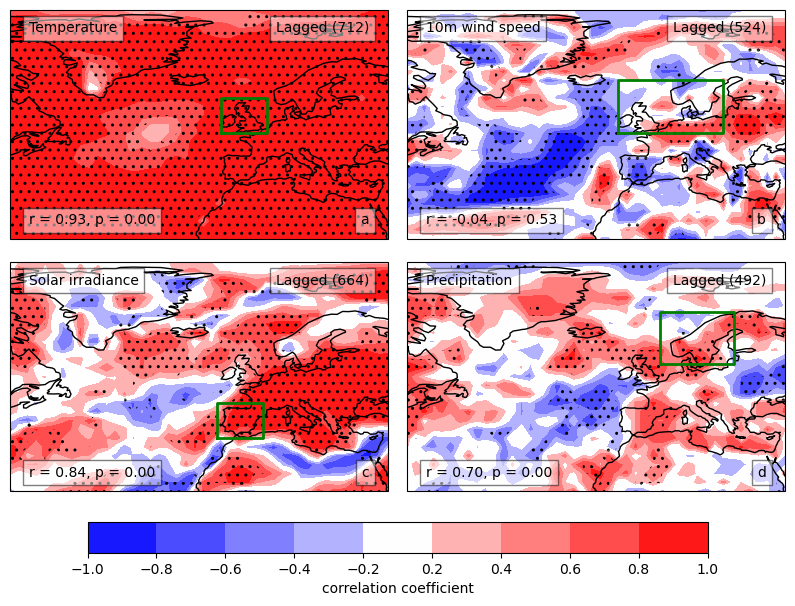

In [40]:
# Plot the skill maps
p1_fnc.plot_diff_variables(
    bs_skill_maps=stats_dicts1,
    season=season,
    forecast_range=forecast_range,
    methods=methods1,
    figsize_x=10,
    figsize_y=8,
    gridbox_corr=gridbox_corr_list,
    gridbox_plot=dicts.north_atlantic_grid_plot,
    winter_n_gridbox_corr=dicts.iceland_grid_corrected,
    winter_s_gridbox_corr=dicts.azores_grid_corrected,
    corr_list=["corr1", "corr1", "corr1", "corr1"],
    ts_list=["f1_ts", "f1_ts", "f1_ts", "f1_ts"],
)

In [ ]:
# Same but for the alt_lag method
stats_dicts = p1_fnc.create_bs_dict(
    variables=variables,
    no_bootstraps=no_bootstraps_list,
    season=season,
    forecast_range=forecast_range,
    method="alt_lag",
)

TypeError: create_bs_dict() got an unexpected keyword argument 'method'

In [ ]:
# Plot the skill maps
p1_fnc.plot_diff_variables(
    bs_skill_maps=stats_dicts,
    season=season,
    forecast_range=forecast_range,
    figsize_x=12,
    figsize_y=10,
    gridbox_corr=dicts.uk_grid,
    gridbox_plot=dicts.pacific_grid_plot,
)

In [ ]:
# Same but for years 2-5
forecast_range = "2-5"

# Form the stats dictionaries for these
stats_dicts = p1_fnc.create_bs_dict(
    variables=variables,
    no_bootstraps=no_bootstraps_list,
    season=season,
    forecast_range=forecast_range,
    method="new_raw",
)

In [ ]:
# Plot the skill maps
p1_fnc.plot_diff_variables(
    bs_skill_maps=stats_dicts,
    season=season,
    forecast_range=forecast_range,
    figsize_x=12,
    figsize_y=10,
    gridbox_corr=dicts.uk_grid,
    gridbox_plot=dicts.north_atlantic_grid_plot,
)

In [ ]:
# Same but for the alt_lag method
stats_dicts = p1_fnc.create_bs_dict(
    variables=variables,
    no_bootstraps=no_bootstraps_list,
    season=season,
    forecast_range=forecast_range,
    method="alt_lag",
)

In [ ]:
# Plot the skill maps
p1_fnc.plot_diff_variables(
    bs_skill_maps=stats_dicts,
    season=season,
    forecast_range=forecast_range,
    figsize_x=12,
    figsize_y=10,
    gridbox_corr=dicts.uk_grid,
    gridbox_plot=dicts.north_atlantic_grid_plot,
)

In [ ]:
# Set up global variables
bootstrap_base_dir = "/gws/nopw/j04/canari/users/benhutch/bootstrapping"
plots_dir = "/home/users/benhutch/skill-maps-europe"
region = "global"
forecast_range = "2-9"

# Set up the lists
seasons_list = ["DJFM", "MAM", "JJA", "SON"]
methods_list = ["raw", "lagged", "nao_matched"]
variables_list = [
    "tas",
    "sfcWind",
    "rsds",
    "psl",
]  # Will replace psl with pr at some point

### Testing bootstrapping function ###

The function *forecast_stats* generates all of the forecast stats, however, it currently only runs between 1969 and 2011 (?). We want to test this function so we can calculate the raw forecast stats from initialisation in 1961 to initialisation in 2014.

For now, we don't care about the historical models (forecast2).

In [ ]:
# First we need to prepare the data for this
# Set up the parameters
variable = "tas"
season = "DJFM"
start_year = 1961  # first init year for BCC-CSM2-MR
end_year = 2014  # last valid init year for year 2-9 forecasts
method = "raw"  # Raw forecast skill in the first instance
no_bootstraps = 1  # For speed, just do one bootstrap
base_dir = "/home/users/benhutch/skill-maps-processed-data"

In [ ]:
# Set up the dcpp models for this variable
dcpp_models = nao_match_fnc.match_variable_models(match_var=variable)

In [ ]:
# Set up the observations path for the matching variable
obs_path = nao_match_fnc.find_obs_path(match_var=variable)

In [ ]:
# Prrocess the observations
obs = fnc.process_observations(
    variable=variable,
    region=region,
    region_grid=dicts.gridspec_global,
    forecast_range=forecast_range,
    season=season,
    observations_path=obs_path,
    obs_var_name="t2m",
)

In [ ]:
# Load and process the dcpp model data
dcpp_data = pbs_func.load_and_process_dcpp_data(
    base_dir=base_dir,
    dcpp_models=dcpp_models,
    variable=variable,
    region=region,
    forecast_range=forecast_range,
    season=season,
)

In [ ]:
print((dcpp_data["BCC-CSM2-MR"]))

In [ ]:
# We want to make sure that the obs and dcpp data are aligned
dcpp_data = fnc.constrain_years(dcpp_data, dcpp_models)

In [ ]:
print((dcpp_data["BCC-CSM2-MR"]))

In [ ]:
# Align the obs and dcpp data
obs, dcpp_data, _ = fnc.remove_years_with_nans_nao(
    observed_data=obs, model_data=dcpp_data, models=dcpp_models
)

In [ ]:
print((dcpp_data["BCC-CSM2-MR"]))
print((obs))

In [ ]:
# Convert obs to an array
obs = obs.values

# Print the shapes of the obs data
print(np.shape(obs))

# Extract the years from the obs data
nyears = obs.shape[0]
lats = obs.shape[1]
lons = obs.shape[2]

In [ ]:
# Covert dcpp_data to an array
# Create an empty array
dcpp_ensemble_members = np.sum([len(dcpp_data[model]) for model in dcpp_models])

# Create an empty array to store the data
dcpp_data_array = np.zeros([dcpp_ensemble_members, nyears, lats, lons])

# Create a dummy arrays of zeros to store the ensemble members
hist_data_array = np.zeros([dcpp_ensemble_members, nyears, lats, lons])

# Set up the member index
member_index = 0

# Loop over the models
for model in dcpp_models:
    dcpp_model_data = dcpp_data[model]

    # Loop over the ensemble members
    for member in dcpp_model_data:
        # Increment the member index
        member_index += 1

        # Extract the data
        data = member.values

        # If the data has four dimensions
        if len(data.shape) == 4:
            # Squeeze the data
            data = np.squeeze(data)

        # Assign the data to the forecast1 array
        dcpp_data_array[member_index - 1, :, :, :] = data

        # Assign the data to the hist array
        hist_data_array[member_index - 1, :, :, :] = data

In [ ]:
# print the shape os the obs and dcpp data
print(np.shape(obs))

# print the shape of the dcpp data array
print(np.shape(dcpp_data_array))
print(np.shape(hist_data_array))

In [ ]:
# # Fill the hist data array with 1s
# hist_data_array[:] = 1

In [ ]:
# Print the dcpp data array
print(dcpp_data_array)

In [ ]:
# Print the hist data array
print(hist_data_array)

In [ ]:
# Process the forecast stats for the raw method
forecast_stats = fnc.forecast_stats(
    obs=obs, forecast1=dcpp_data_array, forecast2=hist_data_array, no_boot=no_bootstraps
)

In [ ]:
print(forecast_stats)

### Next steps ###

We have now processed the data for one variable (tas), DJFM, years 2-9. To create the 2x2 matrix of plots for the different variables, we have to do this another three times to generate four dictionaries of forecast stats. It may therefore be worth condensing the above into a function.

In [ ]:
from paper1_plots_functions import forecast_stats_var

In [ ]:
# Use importlib to reload the module
import importlib

# Reload the module
importlib.reload(sys.modules["paper1_plots_functions"])

# Import the function again
from paper1_plots_functions import forecast_stats_var

In [ ]:
# Test the forecast stats var function
forecast_stats_var_dic, nao_stats_dic = forecast_stats_var(
    variables=dicts.paper_1_variables,
    season="DJFM",
    forecast_range=forecast_range,
    start_year=start_year,
    end_year=end_year,
    method=method,
    no_bootstraps=no_bootstraps,
)

In [ ]:
print(nao_stats_dic)

In [ ]:
print((forecast_stats_var_dic["rsds"]))

In [ ]:
# Now we want to plot this data
# Use importlib to reload the module
import importlib

# Reload the module
importlib.reload(sys.modules["paper1_plots_functions"])

# Import the function again
from paper1_plots_functions import forecast_stats_var, plot_forecast_stats_var

In [ ]:
# Test this new function
plot_forecast_stats_var(
    forecast_stats_var_dic=forecast_stats_var_dic,
    nao_stats_dict=nao_stats_dic,
    psl_models=dicts.psl_models,
    forecast_range=forecast_range,
    figsize_x=12,
    figsize_y=10,
    gridbox_corr=dicts.uk_grid,
    gridbox_plot=dicts.north_atlantic_grid_plot,
)

In [ ]:
print((forecast_stats_var_dic["sfcWind"]["corr1_p"]))

corr1_p = forecast_stats_var_dic["sfcWind"]["corr1_p"]

print((corr1_p[0, 0]))

In [ ]:
# Now we want to plot this data
# Use importlib to reload the module
import importlib

# Reload the module
importlib.reload(sys.modules["paper1_plots_functions"])

# Import the function again
from paper1_plots_functions import forecast_stats_var, plot_forecast_stats_var

In [ ]:
# Now change the season to JJA
forecast_stats_var_dic_jja, nao_stats_dic_jja = forecast_stats_var(
    variables=dicts.paper_1_variables,
    season="JJA",
    forecast_range=forecast_range,
    start_year=start_year,
    end_year=end_year,
    method=method,
    no_bootstraps=no_bootstraps,
)

In [ ]:
# And plot this
plot_forecast_stats_var(
    forecast_stats_var_dic=forecast_stats_var_dic_jja,
    nao_stats_dict=nao_stats_dic_jja,
    psl_models=dicts.psl_models,
    season="JJA",
    forecast_range=forecast_range,
    figsize_x=12,
    figsize_y=10,
    gridbox_corr=dicts.uk_grid,
    gridbox_plot=dicts.north_atlantic_grid_plot,
)

In [ ]:
# # Exploring bootstrapped
# # corr1_p output for psl JJA 1000 bootstraps
# dir = "/gws/nopw/j04/canari/users/benhutch/bootstrapping/psl/global/JJA/2-9/raw/no_bootstraps_1000"
# filename="corr1_p_psl_global_JJA_2-9.npy"

# # Load the data
# corr1_p_psl_jja = np.load(os.path.join(dir, filename))

### Plotting NAO time series ###

We also want to plot the NAO time series in this plot. First of all just the raw time series, then it would be nice to have the lagged and variance-adjusted time series as well. First let's see what we functions we can use from other files.